<a href="https://colab.research.google.com/github/gonewithharshwinds/ml_mine_prediction/blob/main/Mine_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mine Prediction
---
- Procedure -
  - Background
  - Data input
  - Data learning
  - Pre processing
  - Test Train split
  - Modelling - NB, Logistic regression, (2)k-NN
  - Scoring & Model Selection
  - Deployment

**Reference :** <br>
  *1. [IET Research](https://ietresearch.onlinelibrary.wiley.com/doi/full/10.1049/iet-rsn.2018.5493) : Material recognition based on the time delay of secondary reflections using wideband sonar pulses* <br>
  *2. [Kaggle](https://www.kaggle.com/datasets/ypzhangsam/sonaralldata) (dataset) `Sonar All Data`* <br>
  *3. [Kaggle API - Colab](https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb#scrollTo=OppyMnCuWjzJ) Documentation*

## Background
---

Background Information
> The echo from the target is formed by a number of processes that occur during reflection of the pulse from an object. The timing of these reflected components and geometry of their wave paths determine speed of sound in the wave propagating material. The calculated speed of sound is then used to identify the material.

> Naive Bayes can be extended to real-valued attributes, most commonly by assuming a Gaussian distribution. This extension of naive Bayes is called Gaussian Naive Bayes.

> The dataset contains various data column which consist sonar data. Last column tells weather it is a rock (R) or a mine (M)

## Importing Dataset
---
`using gdrive`

In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("/content/drive/My Drive/2022/datasets/sonar.all-data.csv", header=None)

In [18]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [19]:
import numpy as np

## Data Learning
---

In [20]:
df.shape

(208, 61)

In [21]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [23]:
df.apply(pd.Series.value_counts)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
0.0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
0.0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
0.0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.9988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.9992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0


In [24]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [25]:
print("Asymmetry : ",0.5-(97/(111+97)))

Asymmetry :  0.033653846153846145


Data Info :
- float64 & object(strings)
- 5788 unique values
- M => 111 values
- R => 97 values
- Asymmetry (M\\R) (deviation) => 0.0336 or 3.37% < 5.00%

## Pre Processing
---

In [26]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R


In [27]:
X = df.drop(columns = 60, axis = 1)
Y = df[60]

In [28]:
X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044


In [29]:
Y.head(2)

0    R
1    R
Name: 60, dtype: object

## ML Models
---

### Naive Bayes

#### Train Test Split
$X,X_{tr},X_{t} <=> (all, train, test)$

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss = StandardScaler()

In [17]:
X1 = ss.fit_transform(X)

In [129]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size = 0.32, stratify=Y, random_state=9876)

In [130]:
print(X1.shape, X1_train.shape, X1_test.shape)

(208, 60) (141, 60) (67, 60)


#### Chi-Square Test

In [131]:
from scipy.stats import chi2_contingency

In [132]:
stat, p, dof, expected = chi2_contingency(X)

In [133]:
alpha = 0.05
print("p value is " + str(p))
print("stat value is " + str(stat))
print("dof value is " + str(dof))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
stat value is 876.6892127322969
dof value is 12213
Independent (H0 holds true)


We use Gaussian since we obtained Independent $H_0$ hypothesis.

#### QQ Plot Test

In [134]:
SSSS = X.mean(axis=0)
SSSS

0     0.029164
1     0.038437
2     0.043832
3     0.053892
4     0.075202
5     0.104570
6     0.121747
7     0.134799
8     0.178003
9     0.208259
10    0.236013
11    0.250221
12    0.273305
13    0.296568
14    0.320201
15    0.378487
16    0.415983
17    0.452318
18    0.504812
19    0.563047
20    0.609060
21    0.624275
22    0.646975
23    0.672654
24    0.675424
25    0.699866
26    0.702155
27    0.694024
28    0.642074
29    0.580928
30    0.504475
31    0.439040
32    0.417220
33    0.403233
34    0.392571
35    0.384848
36    0.363807
37    0.339657
38    0.325800
39    0.311207
40    0.289252
41    0.278293
42    0.246542
43    0.214075
44    0.197232
45    0.160631
46    0.122453
47    0.091424
48    0.051929
49    0.020424
50    0.016069
51    0.013420
52    0.010709
53    0.010941
54    0.009290
55    0.008222
56    0.007820
57    0.007949
58    0.007941
59    0.006507
dtype: float64

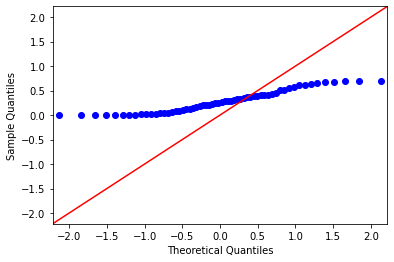

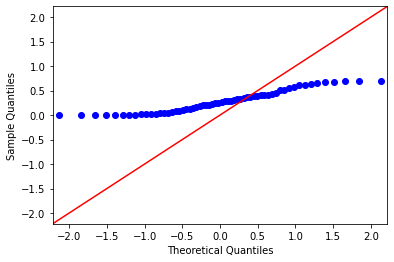

In [135]:
import statsmodels.api as sm
sm.qqplot(SSSS, line="45")

#### GaussianNB


In [136]:
from sklearn.naive_bayes import GaussianNB

In [137]:
NB = GaussianNB()

In [138]:
NB.fit(X1_train, Y1_train)

GaussianNB()

In [139]:
y_prediction = NB.predict(X1_test)

In [140]:
y_prediction.shape

(67,)

In [141]:
y_prediction

array(['M', 'R', 'M', 'R', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R',
       'R', 'M', 'R', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'R', 'R', 'R',
       'R', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'M',
       'R', 'R', 'R', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'R', 'R', 'M',
       'R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M', 'R', 'M',
       'R', 'M'], dtype='<U1')

In [142]:
NB.predict_proba(X1_test) #from library

array([[8.70556097e-01, 1.29443903e-01],
       [3.93427516e-02, 9.60657248e-01],
       [9.49910790e-01, 5.00892096e-02],
       [2.83377710e-02, 9.71662229e-01],
       [5.98829987e-02, 9.40117001e-01],
       [4.50428153e-02, 9.54957185e-01],
       [1.00000000e+00, 2.08771272e-36],
       [2.15171427e-06, 9.99997848e-01],
       [1.00000000e+00, 4.49750388e-18],
       [1.37967982e-03, 9.98620320e-01],
       [9.99999996e-01, 4.05819822e-09],
       [5.91487477e-01, 4.08512523e-01],
       [4.31709950e-02, 9.56829005e-01],
       [1.29339693e-04, 9.99870660e-01],
       [9.88636684e-01, 1.13633164e-02],
       [2.04690809e-03, 9.97953092e-01],
       [9.99999999e-01, 5.40667508e-10],
       [9.99999811e-01, 1.89358036e-07],
       [8.56995144e-01, 1.43004856e-01],
       [3.04243865e-03, 9.96957561e-01],
       [8.92963368e-01, 1.07036632e-01],
       [6.81548285e-01, 3.18451715e-01],
       [1.00000000e+00, 1.57172036e-10],
       [3.85501848e-06, 9.99996145e-01],
       [3.995589

In [143]:
from sklearn.metrics import confusion_matrix, classification_report

In [144]:
print(confusion_matrix(Y1_test, y_prediction))

[[28  8]
 [ 3 28]]


In [145]:
print(classification_report(Y1_test, y_prediction))

              precision    recall  f1-score   support

           M       0.90      0.78      0.84        36
           R       0.78      0.90      0.84        31

    accuracy                           0.84        67
   macro avg       0.84      0.84      0.84        67
weighted avg       0.85      0.84      0.84        67



> For higher values of random_state=9876, the model promises a higher precision and support.

> test_size = 0.32 gives slightly more optimized result of all.

#### Predictive System

In [146]:
deploy_data1 = (0.0311,0.0491,0.0692,0.0831,0.0079,0.0200,0.0980,0.1016,0.2025,0.0767,0.1767,0.2555,0.2812,0.2722,0.3227,0.3463,0.5395,0.7911,0.9064,0.8701,0.7672,0.2957,0.4148,0.6043,0.3178,0.3482,0.6158,0.8049,0.6289,0.4999,0.5830,0.6660,0.4124,0.1260,0.2487,0.4676,0.5382,0.3150,0.2139,0.1848,0.1679,0.2328,0.1015,0.0713,0.0615,0.0779,0.0761,0.0845,0.0593,0.0066,0.0089,0.0087,0.0032,0.0130,0.0188,0.0101,0.0229,0.0182,0.0046,0.0038)

In [148]:
deploy_npdata1 = np.asarray(deploy_data1)
deploy_reshape_data1 = deploy_npdata1.reshape(1,-1)

In [149]:
deploy_reshape_data1.shape

(1, 60)

In [151]:
deploy_data1_in = ss.fit_transform(deploy_reshape_data1)
deploy_data1_out = NB.predict(deploy_data1_in)

In [152]:
deploy_data1_out

array(['R'], dtype='<U1')

In [154]:
NB.predict_proba(deploy_data1_in)

array([[0.03393916, 0.96606084]])

### Logistic Regression

#### Train Test Split
$X,X_{tr},X_{t} <=> (all, train, test)$

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.195, stratify=Y, random_state=42)

In [157]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (167, 60) (41, 60)


#### The Model

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [159]:
model = LogisticRegression()

In [160]:
model.fit(X_train, Y_train)

LogisticRegression()

In [161]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [162]:
print("Accuracy Score :", training_data_accuracy)

Accuracy Score : 0.844311377245509


In [163]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [164]:
print("Accuracy Score :", testing_data_accuracy)

Accuracy Score : 0.8780487804878049


- Train Data Accuracy Score : 0.844311377245509
- Test Data Accuracy Score : 0.8780487804878049

#### Predictive System

In [165]:
deploy_data = (0.0311,0.0491,0.0692,0.0831,0.0079,0.0200,0.0980,0.1016,0.2025,0.0767,0.1767,0.2555,0.2812,0.2722,0.3227,0.3463,0.5395,0.7911,0.9064,0.8701,0.7672,0.2957,0.4148,0.6043,0.3178,0.3482,0.6158,0.8049,0.6289,0.4999,0.5830,0.6660,0.4124,0.1260,0.2487,0.4676,0.5382,0.3150,0.2139,0.1848,0.1679,0.2328,0.1015,0.0713,0.0615,0.0779,0.0761,0.0845,0.0593,0.0066,0.0089,0.0087,0.0032,0.0130,0.0188,0.0101,0.0229,0.0182,0.0046,0.0038)

In [166]:
deploy_npdata = np.asarray(deploy_data)
deploy_reshape_data = deploy_npdata.reshape(1,-1)

In [167]:
prediction = model.predict(deploy_reshape_data)
if (prediction == "R"):
  print("Rock")
elif (prediction == "M"):
  print("Mine")
else:
  print("Neither")

Rock


### kNN

#### Correlation & Center check

In [30]:
X.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

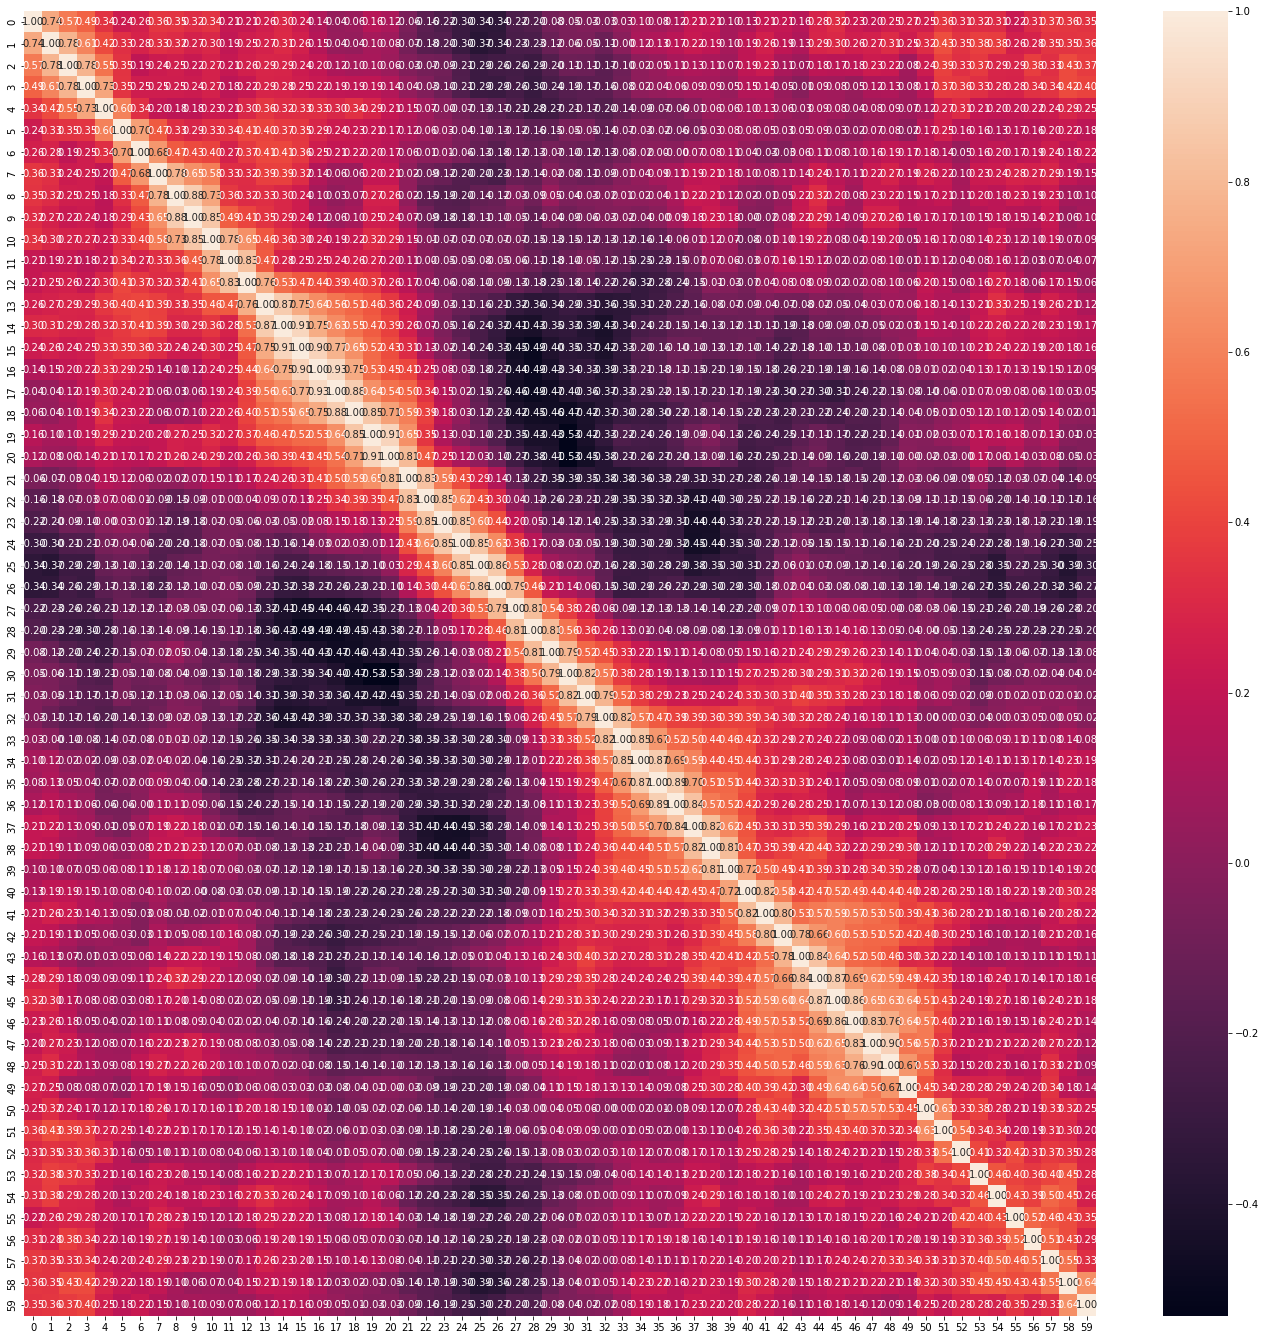

In [34]:
plt.figure(figsize=(24,24))
sns.heatmap(X.corr(), annot=True, fmt = '.2f')
plt.show()

In [39]:
X['cent'] = Y.map({'R':0,'M':1})

In [42]:
np.abs(X.corr()['cent']).sort_values().tail(3)

11      0.392245
10      0.432855
cent    1.000000
Name: cent, dtype: float64

In [43]:
# initial points : 0.432855 & 0.392245

#### Train_Test_Split

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
X2 = X.drop(['cent'], axis=1)
Y2 = Y

In [47]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.25, random_state=42)

In [48]:
ss = StandardScaler()

In [50]:
sX2_train = ss.fit_transform(X2_train)
sX2_test = ss.transform(X2_test)

#### KNN Model

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [52]:
test_accuracy_table = []
for k in range (1,50):
  knn_model = KNeighborsClassifier(n_neighbors = k)
  knn_model.fit(sX2_train, Y2_train)
  y_prediction = knn_model.predict(sX2_test)
  test_accuracy = accuracy_score(Y2_test, y_prediction)
  test_accuracy_table.append(test_accuracy)

In [53]:
print(test_accuracy_table)

[0.9038461538461539, 0.8846153846153846, 0.9230769230769231, 0.9038461538461539, 0.9230769230769231, 0.9423076923076923, 0.8846153846153846, 0.8269230769230769, 0.8269230769230769, 0.7884615384615384, 0.8269230769230769, 0.8076923076923077, 0.7884615384615384, 0.7884615384615384, 0.8269230769230769, 0.8076923076923077, 0.7884615384615384, 0.8076923076923077, 0.8076923076923077, 0.8076923076923077, 0.8269230769230769, 0.8269230769230769, 0.7884615384615384, 0.8269230769230769, 0.8076923076923077, 0.7884615384615384, 0.75, 0.7692307692307693, 0.75, 0.7884615384615384, 0.7884615384615384, 0.7884615384615384, 0.8076923076923077, 0.8076923076923077, 0.8269230769230769, 0.8269230769230769, 0.8076923076923077, 0.7884615384615384, 0.7884615384615384, 0.7884615384615384, 0.7884615384615384, 0.7884615384615384, 0.75, 0.7884615384615384, 0.7307692307692307, 0.7692307692307693, 0.7692307692307693, 0.7692307692307693, 0.75]


In [54]:
confusion_matrix(Y2_test, y_prediction)

array([[23,  7],
       [ 6, 16]])

In [55]:
print(classification_report(Y2_test, y_prediction))

              precision    recall  f1-score   support

           M       0.79      0.77      0.78        30
           R       0.70      0.73      0.71        22

    accuracy                           0.75        52
   macro avg       0.74      0.75      0.75        52
weighted avg       0.75      0.75      0.75        52



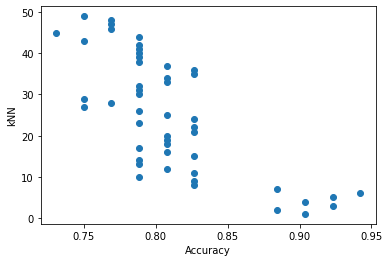

In [58]:
plt.scatter(test_accuracy_table, range(1,50))
plt.xlabel("Accuracy")
plt.ylabel("kNN")
plt.show()

In [59]:
# mapping suggests k = 6 gives maximum 
# We compare 2-NN, 6-NN

#### 2-NN

In [63]:
knn_model = KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(sX2_train, Y2_train)
y_prediction = knn_model.predict(sX2_test)
test_accuracy1 = accuracy_score(Y2_test, y_prediction)
confusion1 = confusion_matrix(Y2_test, y_prediction)
report1 = classification_report(Y2_test, y_prediction)

In [64]:
test_accuracy1

0.8846153846153846

In [65]:
confusion1

array([[28,  2],
       [ 4, 18]])

In [67]:
print(report1)

              precision    recall  f1-score   support

           M       0.88      0.93      0.90        30
           R       0.90      0.82      0.86        22

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52



#### 6-NN

In [68]:
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model.fit(sX2_train, Y2_train)
y_prediction = knn_model.predict(sX2_test)
test_accuracy2 = accuracy_score(Y2_test, y_prediction)
confusion2 = confusion_matrix(Y2_test, y_prediction)
report2 = classification_report(Y2_test, y_prediction)

In [69]:
test_accuracy2

0.9423076923076923

In [70]:
confusion2

array([[29,  1],
       [ 2, 20]])

In [73]:
print(report2)

              precision    recall  f1-score   support

           M       0.94      0.97      0.95        30
           R       0.95      0.91      0.93        22

    accuracy                           0.94        52
   macro avg       0.94      0.94      0.94        52
weighted avg       0.94      0.94      0.94        52



## Conclusion

---

#### Observations :

**Score Observation** :
We observe that all models perform nearly the same within the range if $84\%$ to $89\%$, although, $k=6$ k-NN model performs with $94\%$ accuracy on the test data.

---

---

##### KNN

---
- 6-NN 
  - Confusion Matrix : array([[29,  1],[ 2, 20]])
    - False Positive : 1, False Negative : 2
  - Classification Report :

||precision|recall|f1-score|support|
|:---:|:---:|:---:|:---:|:---:|
| M     |  0.94    |  0.97  |    0.95   |     30|
| R     |  0.95    |  0.91   |   0.93     |   22|
||
|accuracy|||0.94|52|
|macro avg    |   0.94   |   0.94   |   0.94    |    52|
|macro avg|0.94 |0.94 |0.94|52|

- 2-NN
  - Confusion Matrix :array([[28,  2],[ 4, 18]])
    - False Positive : 2, False Negative : 4
  - Classification Report :

||   precision   | recall|  f1-score |  support|
|:---:|:---:|:---:|:---:|:---:|
 |          M   |    0.88   |   0.93  |    0.90   |     30|
 |          R   |    0.90  |    0.82  |    0.86   |     22|
||
  |  accuracy   |           |         |    0.88   |     52|
 |  macro avg   |    0.89     | 0.88    |  0.88   |     52|
|weighted avg   |    0.89   |   0.88   |   0.88   |     52|


Test Data Accuracy -> 
  - $2-NN => 88\%$
  - $6-NN => 94\%$

---
##### Naive Bayes
---
Method : GaussianNB
- Confusion Matrix : [[28  8],[ 3 28]]
- Classification Report :

||  precision  |  recall|  f1-score   |support|
|:---:|:---:|:---:|:---:|:---:|
|         M    |   0.90   |   0.78  |    0.84  |     36|
|         R   |    0.78   |  0.90   |   0.84   |     31|
||
|   accuracy    |          |         |    0.84   |     67|
|   macro avg    |   0.84  |    0.84  |    0.84   |     67|
|weighted avg    |   0.85  |    0.84|      0.84   |     67|

Test Data Accuracy Score -> $84\%$

---
##### Logistic Regression
---
Scoring :
- Train Data Accuracy Score : 0.844311377245509
- Test Data Accuracy Score : 0.8780487804878049

Accuracy :
- Train Data Accuracy : $84.4311\%$
- Test Data Accuracy : $87.8049\%$

---

#### Winner?

- **KNN**
  - *Why k = 2 or 6 was computed?* : We have two parameters. Rock and Mine. k=6 showed highest accuracy.
  - *Why reject k = 2* : Noise would have a lot of influence on k = 2.
  - *Can k=6 be considered accurate* :  Additional study can be done to understand the high scoring at k=6. From the graph of k-values vs accuracy, there is quite the chance one might understand that values 1 to 7 maybe under the influence of noise. When we compute $n^{0.5}$, we obtain $14.442$. Naturally, it's safe to choose k = 15 which gives $82.69\%$, highest accuracy amongst the group of $8^{th}$ to $45^{th}$
  - **Conclusion** : With kNN, we can obtain a maximum accuracy of $94\%$ while a safer choice would deliver $82.69\%$.

- **GNB**
  - GNB delivers a better support score when compared with kNN.
  - When compared with 15-NN, GNB performs better.
  - When compared with Logistic Regression, it performs nearly $84\%$ which is the same as LogisticRegression with Train Data and lags behind by approx. $3\%$ when compared to Test Data LogisticRegression Accuracy.
  - We notice higher precision scores, uniform behavior in macro avg and weighted avg scores.
  - **Conclusion** : GNB maintains uniformity in scoring amongst the three with good support.

- **LogReg**
  - Train and Test data accuracy scores are close with difference of $3.4\%$. 
  - Although Logistic Regression performs the best amongst all, the difference in test and train data accuracy scores may show a deviation in real life. We may assume 82% to 89%.
  - **Conclusion** : Amongst the three, Logistic regression is most likely to perform the best "for the given models considered". 

- **Winner**
  - kNN has potential to perform even higher if optimised further. Until then, Logistic Regression wins the match. GNB obtains good support score *(pun : wins the hearts of the crowd!)*

---